In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier,plot_importance

In [2]:
data = pd.read_csv('train_1.csv')
dataset= data.copy()
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Provided,Title,Age_Group,Fare_Group,Total_Members,Age_Class,fare_per_person,Alone
0,1,0,3,0,22.0,1,0,0.916454,0,0,0,4,1,1,66.0,0.000000,0
1,2,1,1,1,38.0,1,0,1.859038,1,1,2,6,4,1,38.0,0.000000,0
2,3,1,3,1,26.0,0,0,0.950608,0,0,1,5,1,0,78.0,0.950608,1
3,4,1,1,1,35.0,1,0,1.733197,0,1,2,6,4,1,35.0,0.000000,0
4,5,0,3,0,35.0,0,0,0.956649,0,0,0,6,1,0,105.0,0.956649,1


In [3]:
y = dataset['Survived']
print('All Columns : {}'.format(dataset.columns.values))
#cols_to_drop = ['Survived','PassengerId']
cols_to_drop = ['Survived','PassengerId']
cols_to_inc = list(set(dataset.columns) - set(cols_to_drop))
print(' Dropped Columns : {}'.format(cols_to_drop))

x = dataset.drop(cols_to_drop,axis=1)
cat_columns = []
#cat_columns = ['Sex', 'Age_Group', 'Title', , 'Fare_Group', 'Cabin_Codes', 'Age_Class','Pclass']
#cat_columns = ['Sex','Pclass','Title',]
num_columns = list(set(x.columns)- set(cat_columns))
print('Cateogrical Columns : {} \n Numerical Columns : {}'.format(cat_columns,num_columns))
x.head()

All Columns : ['PassengerId' 'Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare'
 'Embarked' 'Cabin_Provided' 'Title' 'Age_Group' 'Fare_Group'
 'Total_Members' 'Age_Class' 'fare_per_person' 'Alone']
 Dropped Columns : ['Survived', 'PassengerId']
Cateogrical Columns : [] 
 Numerical Columns : ['Parch', 'Fare_Group', 'Age_Class', 'Cabin_Provided', 'Alone', 'Total_Members', 'Fare', 'Age_Group', 'Embarked', 'SibSp', 'fare_per_person', 'Pclass', 'Age', 'Sex', 'Title']


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Provided,Title,Age_Group,Fare_Group,Total_Members,Age_Class,fare_per_person,Alone
0,3,0,22.0,1,0,0.916454,0,0,0,4,1,1,66.0,0.000000,0
1,1,1,38.0,1,0,1.859038,1,1,2,6,4,1,38.0,0.000000,0
2,3,1,26.0,0,0,0.950608,0,0,1,5,1,0,78.0,0.950608,1
3,1,1,35.0,1,0,1.733197,0,1,2,6,4,1,35.0,0.000000,0
4,3,0,35.0,0,0,0.956649,0,0,0,6,1,0,105.0,0.956649,1


In [7]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.90629943, -0.76584388, -0.52023048, ...,  0.14333403,
        -1.05650911, -1.13348562],
       [-1.48565346,  1.30574915,  0.63187767, ..., -0.69753037,
        -1.05650911, -1.13348562],
       [ 0.90629943,  1.30574915, -0.23220344, ...,  0.50370449,
         0.45487246,  0.8822344 ],
       ...,
       [-1.48565346,  1.30574915, -0.73625076, ..., -1.26811693,
         1.31462184,  0.8822344 ],
       [-1.48565346, -0.76584388, -0.23220344, ..., -1.05790083,
         1.31462184,  0.8822344 ],
       [ 0.90629943, -0.76584388,  0.19983712, ...,  1.04426017,
         0.44119896,  0.8822344 ]])

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=33)

In [9]:
y_train.sum()/y_train.shape[0],y_test.sum()/y_test.shape[0]

(0.4095744680851064, 0.4084507042253521)

In [11]:
clf = XGBClassifier(n_estimators=100)
clf =clf.fit(x_train,y_train)

In [12]:
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)[:,1]

In [13]:
from sklearn.metrics import f1_score,roc_auc_score,roc_curve,recall_score,precision_score,confusion_matrix,accuracy_score,classification_report,precision_recall_curve,average_precision_score

In [14]:
print('Train Accuracy :', accuracy_score(y_train,clf.predict(x_train)).round(4)*100,'ROC :', roc_auc_score(y_train,clf.predict_proba(x_train)[:,1]).round(4)*100)
print('Test Accuracy :', accuracy_score(y_test,y_pred).round(4)*100,'ROC :', roc_auc_score(y_test,y_proba).round(4)*100)

Train Accuracy : 98.76 ROC : 99.98
Test Accuracy : 82.39 ROC : 88.51


In [15]:
print('--confusion Matrix--')
cm =confusion_matrix(y_test,y_pred,labels=[0,1])
print(cm)

print('--classification report--')
print(classification_report(y_test,y_pred,labels=[0,1]))


--confusion Matrix--
[[73 11]
 [14 44]]
--classification report--
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        84
           1       0.80      0.76      0.78        58

    accuracy                           0.82       142
   macro avg       0.82      0.81      0.82       142
weighted avg       0.82      0.82      0.82       142



[Text(0, 0.5, 'True Positive Rate'), Text(0.5, 0, 'False Positive Rate')]

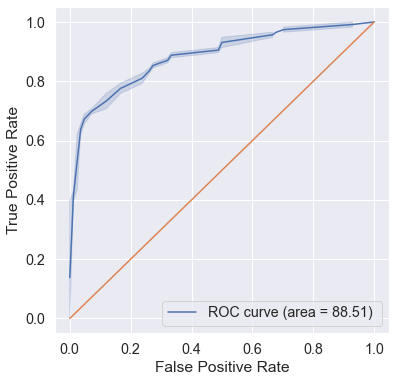

In [16]:
fpr,tpr,threshold = roc_curve(y_test,y_proba)
sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = roc_auc_score(y_test,y_proba)
fig =sns.lineplot(fpr,tpr,label='ROC curve (area = {}) '.format(area.round(4)*100))
sns.lineplot([0,1],[0,1],markers='--')
fig.set(xlabel='False Positive Rate',ylabel='True Positive Rate')


[Text(0, 0.5, 'Recall'), Text(0.5, 0, 'Precision')]

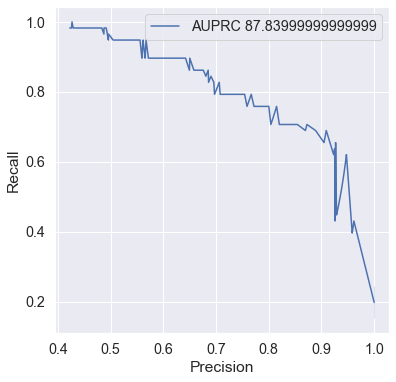

In [17]:
pr, rc, thresholds = precision_recall_curve(y_test, y_proba)
sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = average_precision_score(y_test,y_proba)
fig =sns.lineplot(pr,rc,label='AUPRC {}'.format(area.round(4)*100))
fig.set(xlabel='Precision',ylabel='Recall')

In [27]:
num_columns

['Parch',
 'Fare_Group',
 'Age_Class',
 'Cabin_Provided',
 'Alone',
 'Total_Members',
 'Fare',
 'Age_Group',
 'Embarked',
 'SibSp',
 'fare_per_person',
 'Pclass',
 'Age',
 'Sex',
 'Title']

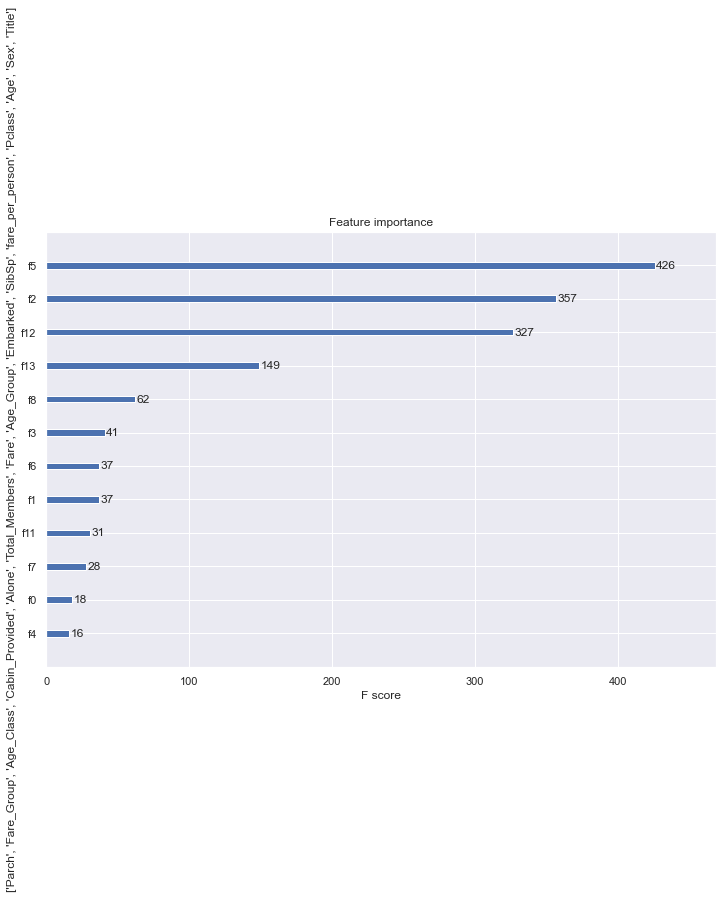

In [26]:
plot_importance(clf,)

In [18]:
from sklearn.model_selection import cross_validate,StratifiedKFold,GridSearchCV

In [19]:
scv = StratifiedKFold(4,random_state=33, shuffle=True)

In [20]:
cv_score =cross_validate(clf,x,y,scoring=['roc_auc','accuracy'],cv=scv,n_jobs=3,verbose=1)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    9.5s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    9.5s finished


In [21]:

stats = pd.DataFrame(index=['Mean','Std','Min','Max'],
            data={
                'ROC_AUC':[np.mean(cv_score['test_roc_auc']),np.std(cv_score['test_roc_auc']),np.min(cv_score['test_roc_auc']),np.max(cv_score['test_roc_auc'])],
                'Accuracy' : [np.mean(cv_score['test_accuracy']),np.std(cv_score['test_accuracy']),np.min(cv_score['test_accuracy']),np.max(cv_score['test_accuracy'])]
            })

stats = stats.round(4)*100
stats

,ROC_AUC,Accuracy
Mean,87.66,81.30
Std,2.55,1.13
Min,83.32,80.11
Max,89.72,82.49


In [26]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

param_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)
  
cv_model = GridSearchCV(clf,param_grid,cv=scv,verbose=3,scoring='accuracy',n_jobs=-1)
cv_model.fit(x,y)


Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:   11.2s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   11.3s finished


AttributeError: 'str' object has no attribute 'requires_vector_input'

In [59]:
cv_model.best_params_,cv_model.best_score_

({'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, 0.8350452470407628)

In [60]:
y_pred = cv_model.predict(x_test)
y_proba = cv_model.predict_proba(x_test)[:,1]
print('Train Accuracy :', accuracy_score(y_train,cv_model.predict(x_train)).round(4)*100,'ROC :', roc_auc_score(y_train,clf.predict_proba(x_train)[:,1]).round(4)*100)
print('Test Accuracy :', accuracy_score(y_test,y_pred).round(4)*100,'ROC :', roc_auc_score(y_test,y_proba).round(4)*100)
print('--confusion Matrix--')
cm =confusion_matrix(y_test,y_pred,labels=[0,1])
print(cm)

print('--classification report--')
print(classification_report(y_test,y_pred,labels=[0,1]))


Train Accuracy : 83.43 ROC : 89.09
Test Accuracy : 86.03 ROC : 89.3
--confusion Matrix--
[[100  10]
 [ 15  54]]
--classification report--
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       110
           1       0.84      0.78      0.81        69

    accuracy                           0.86       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



[Text(0, 0.5, 'True Positive Rate'), Text(0.5, 0, 'False Positive Rate')]

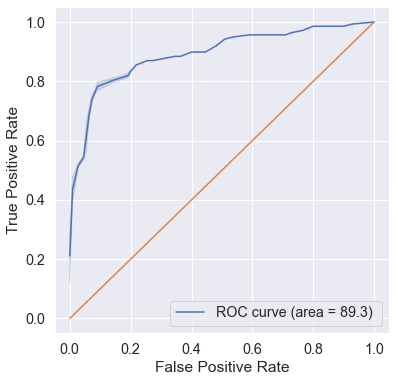

In [61]:
fpr,tpr,threshold = roc_curve(y_test,y_proba)
sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = roc_auc_score(y_test,y_proba)
fig =sns.lineplot(fpr,tpr,label='ROC curve (area = {}) '.format(area.round(4)*100))
sns.lineplot([0,1],[0,1],markers='--')
fig.set(xlabel='False Positive Rate',ylabel='True Positive Rate')


[Text(0, 0.5, 'Recall'), Text(0.5, 0, 'Precision')]

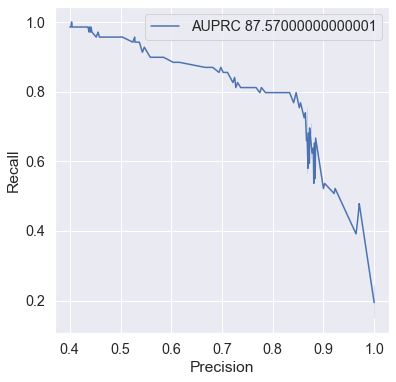

In [62]:
pr, rc, thresholds = precision_recall_curve(y_test, y_proba)
sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = average_precision_score(y_test,y_proba)
fig =sns.lineplot(pr,rc,label='AUPRC {}'.format(area.round(4)*100))

fig.set(xlabel='Precision',ylabel='Recall')

In [3]:
test_data = pd.read_csv('test_1.csv')

In [4]:
test_data.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Cabin_Codes,Title,Age_Group,Total_Members,Fare_Group,Age_Class,fare_per_person,Alone
0,892,3,0,0,0,2,0,0,4,0,1,102,7,1
1,893,3,1,1,0,0,0,2,6,1,1,141,3,0
2,894,2,0,0,0,2,0,0,5,0,2,124,9,1
3,895,3,0,0,0,0,0,0,6,0,2,81,8,1
4,896,3,1,1,1,0,0,2,6,2,2,66,4,0


In [7]:
test_data['Age_Group'].value_counts()

5    137
4     97
6     70
7     35
3     33
1     24
8     10
2     10
0      2
Name: Age_Group, dtype: int64

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


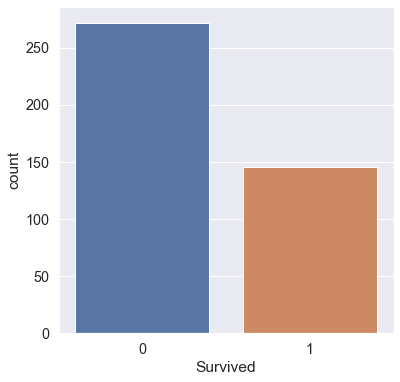

In [47]:
test_data = pd.read_csv('test_1.csv')
test_data = test_data.sample(frac=1)
passenger_id = test_data.PassengerId
test_data = test_data.drop(cols_to_drop[1:],axis=1)
test_data = scaler.transform(test_data)
result = pd.DataFrame({
                        'PassengerId': passenger_id,
                        'Survived': cv_model.predict(test_data)
                        })
result = result.sort_values(by='PassengerId')
print(result.head())
sns.countplot(result['Survived'])

In [ ]:
cv_model.predict(test_data)

In [705]:
result.to_csv('Prediction_56.csv',index=False)